In [1]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))
    
import sys
python = sys.executable

# In your environment run:
!{python} -m pip install -U rasa_core==0.11.11 rasa_nlu==0.13.6;
!{python} -m pip install sklearn_crfsuite;

import rasa_nlu
import rasa_core

print("rasa_nlu: {} rasa_core: {}".format(rasa_nlu.__version__, rasa_core.__version__))

!apt-get -qq install -y graphviz libgraphviz-dev pkg-config;
!{python} -m pip install pygraphviz;



    100% |████████████████████████████████| 184kB 7.3MB/s 
    100% |████████████████████████████████| 153kB 31.5MB/s 
    100% |████████████████████████████████| 61kB 22.9MB/s 
    100% |████████████████████████████████| 307kB 23.4MB/s 
    100% |████████████████████████████████| 655kB 21.3MB/s 
    100% |████████████████████████████████| 112kB 30.3MB/s 
    100% |████████████████████████████████| 51kB 20.4MB/s 
    100% |████████████████████████████████| 4.9MB 5.6MB/s 
    100% |████████████████████████████████| 71kB 24.8MB/s 
    100% |████████████████████████████████| 71kB 24.9MB/s 
    100% |████████████████████████████████| 962kB 22.4MB/s 
    100% |████████████████████████████████| 235kB 31.6MB/s 
    100% |████████████████████████████████| 58.4MB 542kB/s 
    100% |████████████████████████████████| 12.6MB 4.1MB/s 
    100% |████████████████████████████████| 81kB 22.3MB/s 
    100% |████████████████████████████████| 81kB 25.0MB/s 
    100% |████████████████████████████████| 81kB

In [2]:
nlu_md = """

## intent:greet
- hey
- hello there
- hi
- hello there
- good morning
- good evening
- moin
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- cu
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:affirm
- yes
- indeed
- of course
- that sounds good
- correct
- definitely
- absolutely
- sure
- yep

## intent:deny
- no
- never
- I don't think so
- don't like that
- no way
- not really
- nope
- definitely no
- no no


## intent:paper_search
- Looking for papers about [chatbots](paper_type)
- Please suggest some interesting papers to read
- Looking for some new papers about [machine learning](paper_type)
- Any recommendataions for [statistics](paper_type) papers to read?
- I have some spare time and would like to read some [mathematics](paper_type) papers.
- Looking for papers to read
- Do you have new papers to recommend?
- Would like to read some papers about [physics](paper_type).
- Please recommend some interesting papers about [astronomy](paper_type).
- Looking for [econometrics](paper_type) papers.
- Looking for papers in [artificial intelligence](paper_type)
- Please share some papers to read
- Looking for [Physics](paper_type) to read.
- Can you recommend me [Mathematics](paper_type)?
- Any interesting papers [statistics](paper_type) you can recommend?


## intent:affirm+authors
- Yes. Also, tell me who are the authors.
- Yes, please. By the way, who are the authors of the paper?
- Sure. I woud also like to know the authors.
- Yes! And a list of authors please.
- Definitely. Also, please share who are the authors.
- Yes. Can I also see who the authors are?
- Sure. Also, please tell me who are the authors.
- Sure. Can you give me a list of authors as well?
- Yes. Tell me who wrote this paper as well.
- Sure. Who wrote this paper?
- Sounds good. I am also interested in who wrote this paper?

## intent:authors
- Tell me who are the authors first
- Please tell me the who are the authors
- I would like to see who are the authors first
- Before I decide I would like to see the authors
- Show me the authors please
- Can I see the authors first?
- Who wrote this paper?
- I would like to know who is the author of this paper.
- Tell me who wrote the paper.
- Who is the author?
- Do you know who is the author of the paper?
- Who wrote it?
- Do you know the author?

## intent:send_link
- Send me a link to the paper
- Can I get a link
- Send me a link
- Please send me a link so I can read it
- Send me a link to it please
- I would like to get a link

## intent:inform
- about [statistics](paper_type)
- maybe [mathematics](paper_type)
- about [geography](paper_type)
- for [machine learning](paper_type)
- about [differentiation](paper_type)
- maybe about [calculus](paper_type)

## intent:thanks
- thanks
- thank you
- thank you very much
- thanks a lot
- thank you so much
- thank you loads
"""

%store nlu_md > nlu.md

Writing 'nlu_md' (str) to file 'nlu.md'.


In [3]:
config = """
language: "en"

pipeline:
- name: "tokenizer_whitespace"                              #defines how unstructured sentences will be tokenized
- name: "ner_crf"                                           #defines the model which will be used for entity extraction
- name: "intent_featurizer_count_vectors"                   #creates sentence representation
- name: "intent_classifier_tensorflow_embedding"            #defines a classifier for intent classification
  intent_tokenization_flag: true                            #sets the flag for intent label tokenization
  intent_split_symbol: "+"                                  #defines the character on which intent labels should be tokenized
""" 

%store config > config.yml

Writing 'config' (str) to file 'config.yml'.


INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 99 (10 distinct intents)
	- Found intents: 'greet', 'thanks', 'paper_search', 'inform', 'affirm', 'goodbye', 'authors', 'affirm+authors', 'deny', 'send_link'
	- entity examples: 17 (1 distinct entities)
	- found entities: 'paper_type'

INFO:rasa_nlu.model:Starting to train component tokenizer_whitespace
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component ner_crf
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_count_vectors
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_classifier_tensorflow_embedding
INFO:rasa_nlu.classifiers.embedding_intent_classifier:Accuracy is updated every 10 epochs
Epochs: 100%|██████████| 300/300 [00:04<00:00, 63.23it/s, loss=0.124, acc=0.99

{
  "intent": {
    "name": "authors",
    "confidence": 0.8497143983840942
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "authors",
      "confidence": 0.8497143983840942
    },
    {
      "name": "affirm+authors",
      "confidence": 0.4616399109363556
    },
    {
      "name": "goodbye",
      "confidence": 0.06621037423610687
    },
    {
      "name": "inform",
      "confidence": 0.004991933703422546
    },
    {
      "name": "greet",
      "confidence": 0.0
    },
    {
      "name": "paper_search",
      "confidence": 0.0
    },
    {
      "name": "deny",
      "confidence": 0.0
    },
    {
      "name": "thanks",
      "confidence": 0.0
    },
    {
      "name": "send_link",
      "confidence": 0.0
    },
    {
      "name": "affirm",
      "confidence": 0.0
    }
  ],
  "text": "Who are the authors?"
}


INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 99 (10 distinct intents)
	- Found intents: 'greet', 'thanks', 'paper_search', 'inform', 'affirm', 'goodbye', 'authors', 'affirm+authors', 'deny', 'send_link'
	- entity examples: 17 (1 distinct entities)
	- found entities: 'paper_type'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 99 examples that have a defined intent out of 99 examples
INFO:rasa_nlu.evaluate:F1-Score:  0.9899165568730787
INFO:rasa_nlu.evaluate:Precision: 0.9907407407407407
INFO:rasa_nlu.evaluate:Accuracy:  0.98989898989899
INFO:rasa_nlu.evaluate:Classification report: 
                precision    recall  f1-score   support

        affirm       1.00      1.00      1.00         9
affirm+authors       1.00      1.00      1.00        11
       authors       1.00      1.00      1.00        13
          deny       1.00      1.00      1.00         9
       goodbye       0

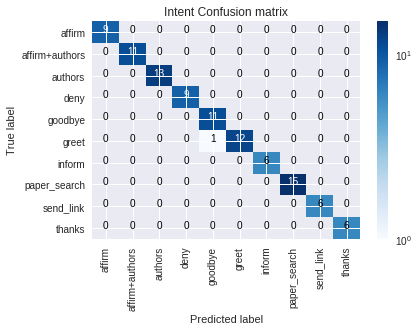

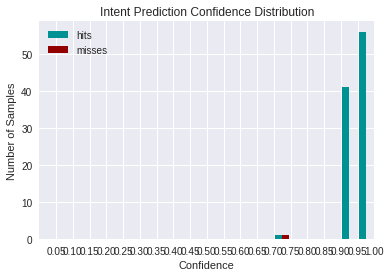

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  1.0
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  1.0
INFO:rasa_nlu.evaluate:Classification report: 
             precision    recall  f1-score   support

  no_entity       1.00      1.00      1.00       414
 paper_type       1.00      1.00      1.00        20

avg / total       1.00      1.00      1.00       434



In [4]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data, verbose=True)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")


pprint(interpreter.parse("Who are the authors?"))

from rasa_nlu.evaluate import run_evaluation
import IPython
from IPython import display

run_evaluation("nlu.md", model_directory)

In [5]:
stories_md = """


## Suggestion path 1
* greet
  - utter_greet
* paper_search
  - utter_what_type
* inform{"paper_type":"machine learning"}
  - action_paper_search
  - utter_approve
* affirm
  - utter_send_link
* goodbye
  - utter_goodbye

## Suggestion path 2
* greet
  - utter_greet
* paper_search{"paper_type":"chatbots"}
  - action_paper_search
  - utter_approve
* affirm+authors
  - utter_send_link
  - utter_authors
* thanks
  - utter_happy_reading
* goodbye
  - utter_goodbye

## Suggestion path 3
* greet
  - utter_greet
* paper_search{"paper_type":"statistics"}
  - action_paper_search
  - utter_approve
* deny
  - utter_goodbye
  
## Suggestion path 4
* greet
  - utter_greet
* paper_search{"paper_type":"statistics"}
  - action_paper_search
  - utter_approve
* affirm
  - utter_send_link
* authors
  - utter_authors
* thanks
  - utter_happy_reading
* goodbye
  -utter_goodbye
  

## Suggestion path 5
* greet
  - utter_greet
* paper_search{"paper_type":"mathematics"}
  - action_paper_search
  - utter_approve
* authors
  - utter_authors
* send_link
  - utter_send_link
* goodbye
  -utter_goodbye
  
  
## Suggestion path 6
* greet
  - utter_greet
* paper_search
  - utter_what_type
* inform{"paper_type":"chatbots"}
  - action_paper_search
  - utter_approve
* authors
  - utter_authors
* send_link
  - utter_send_link
* thanks
  - utter_happy_reading
* goodbye
  -utter_goodbye 
  
  
## Suggestion path 7
* greet
  - utter_greet
* paper_search
  - utter_what_type
* inform{"paper_type":"chatbots"}
  - action_paper_search
  - utter_approve
* affirm+authors
  - utter_send_link
  - utter_authors
* thanks
  - utter_happy_reading
* goodbye
  -utter_goodbye 
  
  
## Suggestion path 8
* greet
  - utter_greet
* paper_search
  - utter_what_type
* inform{"paper_type":"statistics"}
  - action_paper_search
  - utter_approve
* affirm+authors
  - utter_send_link
  - utter_authors
* thanks
  - utter_happy_reading
* goodbye
  -utter_goodbye   


## Suggestion path 9
* greet
  - utter_greet
* paper_search{"paper_type":"physics"}
  - action_paper_search
  - utter_approve
* affirm
  - utter_send_link
* authors
  - utter_authors
* thanks
  - utter_happy_reading
* goodbye
  -utter_goodbye 

"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


In [6]:
domain_yml = """

intents:
- greet
- goodbye
- paper_search
- inform
- affirm
- affirm+authors
- authors
- thanks
- deny
- send_link

slots:
  paper_type:
    type: text
  link:
    type: text
  authors:
    type: text
    
entities:
- paper_type

actions:
- utter_greet
- utter_goodbye
- utter_send_link
- utter_what_type
- utter_happy_reading
- utter_authors
- utter_approve
- action_paper_search

templates:
  utter_greet:
  - text: "Hey! I am paper search assistant. How can I help"

  utter_goodbye:
  - text: "Have a great day!"

  utter_send_link:
  - text: "Here is a link: {link}"
  
  utter_what_type:
  - text: "What type of paper would you like me to find?"
  
  utter_happy_reading:
  - text: "Enjoy your reading."
  
  utter_approve:
  - text: "Would you like to read this paper? I can send you a link."
  
  utter_authors:
  - text: "Here is a list of authors: {authors}."
"""

%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


INFO:apscheduler.scheduler:Scheduler started
/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
Processed Story Blocks: 100%|██████████| 9/9 [00:00<00:00, 219.29it/s, # trackers=1]


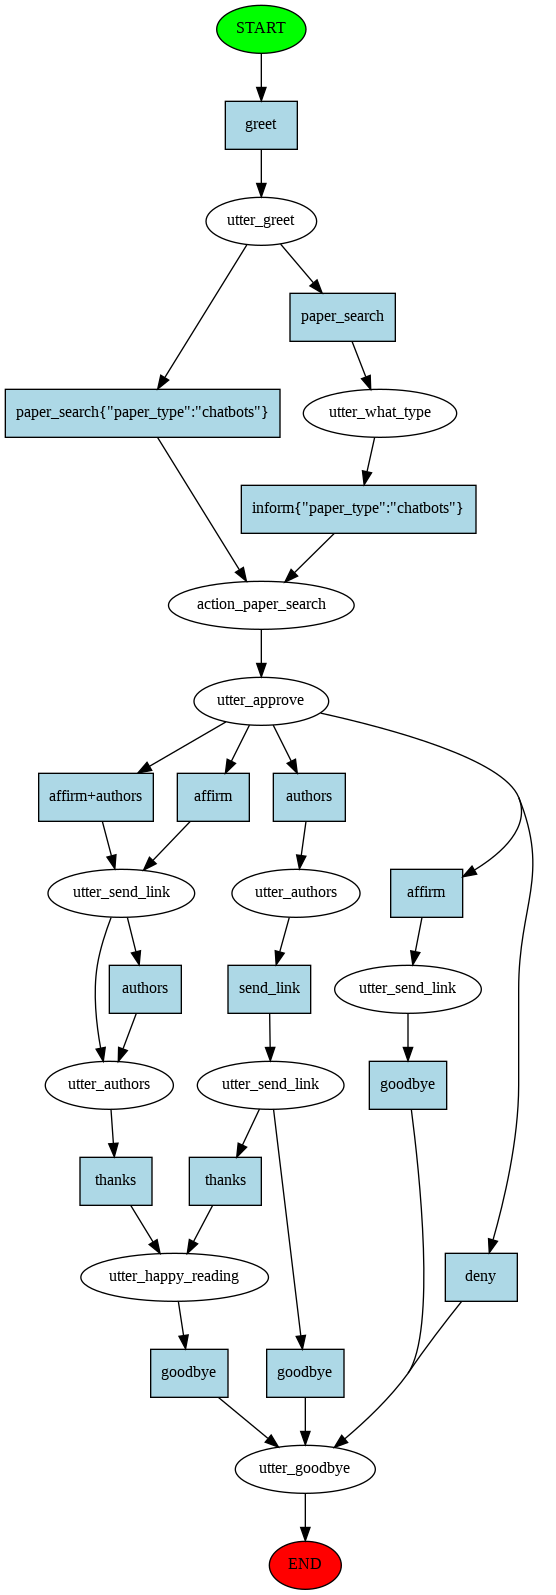

In [7]:
from IPython.display import Image
from rasa_core.agent import Agent

agent = Agent('domain.yml')
agent.visualize("stories.md", "story_graph.png", max_history=2)
Image(filename="story_graph.png")

In [8]:
from rasa_core.policies import KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

# there is a threshold for the NLU predictions as well as the action predictions

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy()])

# loading our neatly defined training dialogues
training_data = agent.load_data('stories.md')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=200
)

agent.persist('models/dialogue')

/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
Processed Story Blocks: 100%|██████████| 9/9 [00:00<00:00, 172.29it/s, # trackers=5]
Processed actions: 77it [00:00, 429.73it/s, # examples=77]
INFO:rasa_core.policies.keras_policy:Fitting model with 77 total samples and a validation split of 0.0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 25)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                7424      
_________________________________________________________________
dense (Dense)                (None, 11)                363       
_________________________________________________________________
activation (Activation)      (None, 11)                0         
Total params: 7,787
Trainable params: 7,787
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
77/77 [==============================] - 1s 10ms/step - loss: 2.3806 - acc: 0.0779
Epoch 2/200
77/77 [==============================] - 0s 581us/step - loss: 2.3267 - acc: 0.1818
Epoch 3/200
77/77 [==============================] - 0s 399us/step - loss: 2.3027

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Persisted model to '/content/models/dialogue'


In [9]:
endpoint = """
action_endpoint:
  url: "http://localhost:5055/webhook"
"""
%store endpoint > endpoints.yml

Writing 'endpoint' (str) to file 'endpoints.yml'.


In [12]:
import IPython
from IPython.display import clear_output
from rasa_core.agent import Agent
from rasa_core.interpreter import NaturalLanguageInterpreter
from rasa_core.utils import EndpointConfig
import time

messages = ["Hi! you can chat in this window. Type 'stop' to end the conversation."]
interpreter = NaturalLanguageInterpreter.create('models/nlu/default/current')
endpoint = EndpointConfig('http://localhost:5055/webhook')
agent = Agent.load('models/dialogue', interpreter=interpreter, action_endpoint = endpoint)

print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

INFO:tensorflow:Restoring parameters from models/nlu/default/current/intent_classifier_tensorflow_embedding.ckpt
/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)


Your bot is ready to talk! Type your messages here or send 'stop'
hi
Hey! I am paper search assistant. How can I help
need some papers
What type of paper would you like me to find?
research papers
I found a paper called Thats great paper!
Would you like to read this paper? I can send you a link.
yes
Here is a link: https://i.chzbgr.com/full/9097238272/h3EBA2E25/
and what are the authors
authors?
hi
/restart
hi
Hey! I am paper search assistant. How can I help


KeyboardInterrupt: ignored

In [11]:
!{python} -m rasa_core.evaluate -d models/dialogue -s stories.md -o matrix.pdf --failed failed_stories.md

/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
2019-02-24 04:57:00.818643: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Processed Story Blocks: 100% 9/9 [00:00<00:00, 2090.30it/s, # trackers=1]
INFO:__main__:Evaluating 7 stories
Progress:
100% 7/7 [00:00<00:00, 24.37it/s]
INFO:__main__:Finished collecting predictions.
INFO:__main__:Evaluation Results on CONVERSATION level:
INFO:__main__:	Correct:   7 / 7
INFO:__main__:	F1-Score:  1.000
INFO:__main__:	Precision: 1.000
IN